In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('medical_charge.csv')

In [4]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


# Encoding the Categorical Variable 


In [5]:
from sklearn.preprocessing import LabelEncoder
df_stat = df.copy()

lb_make = LabelEncoder()
df_stat['sex_encoder'] = lb_make.fit_transform(df['sex'])
df_stat['smoker_encoder'] = lb_make.fit_transform(df['smoker'])
df_stat['region_encoder'] = lb_make.fit_transform(df['region'])



df_stat.head() 

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,sex_encoder,smoker_encoder,region_encoder
0,0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [6]:
df_stat.drop(columns=['sex', 'smoker','region','Unnamed: 0'], inplace=True)
df_stat

,age,bmi,children,charges,sex_encoder,smoker_encoder,region_encoder
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


# Statsmodel Linear regression on full dataset 


In [7]:
import statsmodels.api as sm
featureNames = [x for x in df_stat.columns if x != 'charges']

olsModel = smf.OLS(df_stat['charges'], df_stat[featureNames]).fit()
print(olsModel.summary())

NameError: name 'smf' is not defined

R2 is 87% means the model is capturing 87% variance in the data 

There is no strong coorelation in any of the variable

Age and smoking are the main factor for insurance charges because of high t- statstics

In [ ]:
sns.histplot(olsModel.resid)


In [ ]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(olsModel,fig=fig)

In [ ]:
sns.regplot(y=df.charges, x=olsModel.fittedvalues, fit_reg = True)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Insurance cost")

# Outlier Analysis

In [8]:
df_stat.describe()

,age,bmi,children,charges,sex_encoder,smoker_encoder,region_encoder
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


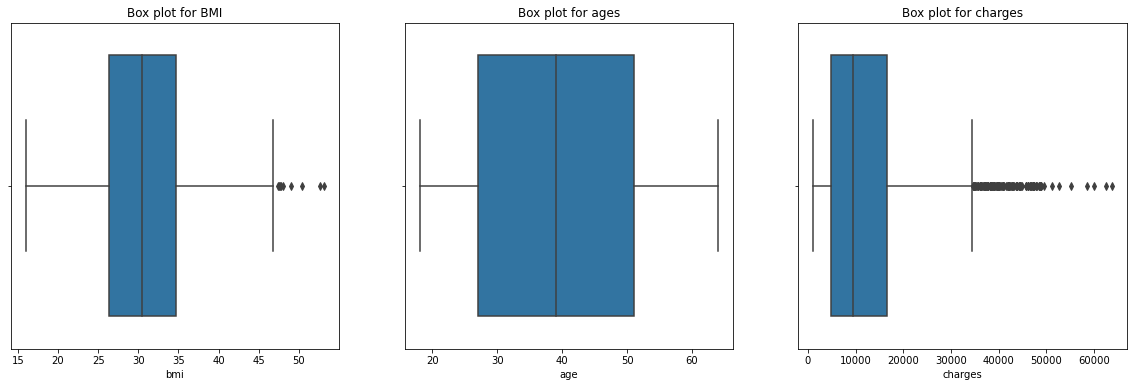

In [9]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.title('Box plot for BMI')
sns.boxplot(x=df_stat["bmi"])

plt.subplot(1,3,2)
plt.title('Box plot for ages')
sns.boxplot(x=df_stat["age"])

plt.subplot(1,3,3)
plt.title('Box plot for charges')
sns.boxplot(x=df_stat["charges"])

plt.show()

There are some out layers in bmi and charges 
so we will try to remove the outlier

### Removing the outlier from BMI considering only data which is less than 47

<AxesSubplot:title={'center':'Box plot for BMI'}, xlabel='bmi'>

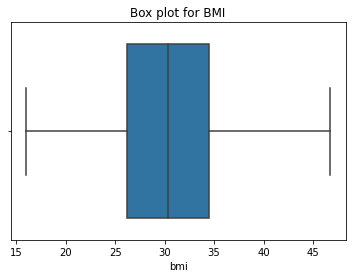

In [10]:
df_stat=df_stat.query("`bmi`<47")
plt.title('Box plot for BMI')
sns.boxplot(x=df_stat["bmi"])

## Applying log transformation for charges 

Text(0.5, 1.0, 'Charges: Before Normalization')

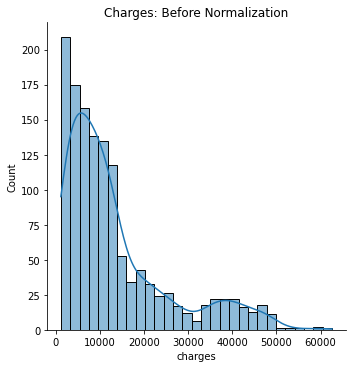

In [11]:
sns.displot(df_stat["charges"],kde=True)
plt.title("Charges: Before Normalization")

In [12]:
#normalize charges
df_stat['charges'] = np.log(df_stat['charges'])
sns.displot(norm_charges,kde=True)
plt.title("Charges: After Normalization")

<ipython-input-12-110a708af78e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat['charges'] = np.log(df_stat['charges'])


NameError: name 'norm_charges' is not defined

<AxesSubplot:title={'center':'Box plot for charges'}, xlabel='charges'>

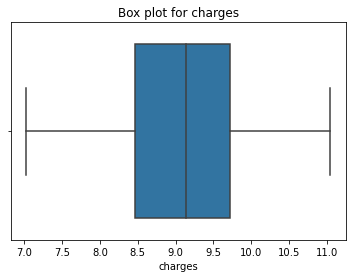

In [13]:
plt.title('Box plot for charges')
sns.boxplot(x=df_stat['charges'])

# Linear regression on full dataset 

In [15]:
import statsmodels.api as sm
import statsmodels.api as smf
featureNames = [x for x in df_stat.columns if x != 'charges']

olsModel = smf.OLS(df_stat['charges'], df_stat[featureNames]).fit()
print(olsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.106e+04
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:23:01   Log-Likelihood:                         -2212.0
No. Observations:                1329   AIC:                                      4436.
Df Residuals:                    1323   BIC:                                      4467.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

R2 is increased to 98%
and we can see some corellation now between variables

T-statstics for bmi, age increased and for somking it decreased.


<AxesSubplot:title={'center':'Residuals distribution for charges'}, ylabel='Count'>

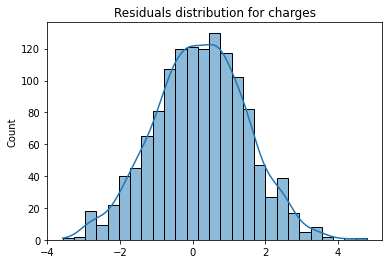

In [19]:
plt.title('Residuals distribution for charges')
sns.histplot(olsModel.resid,kde=True)

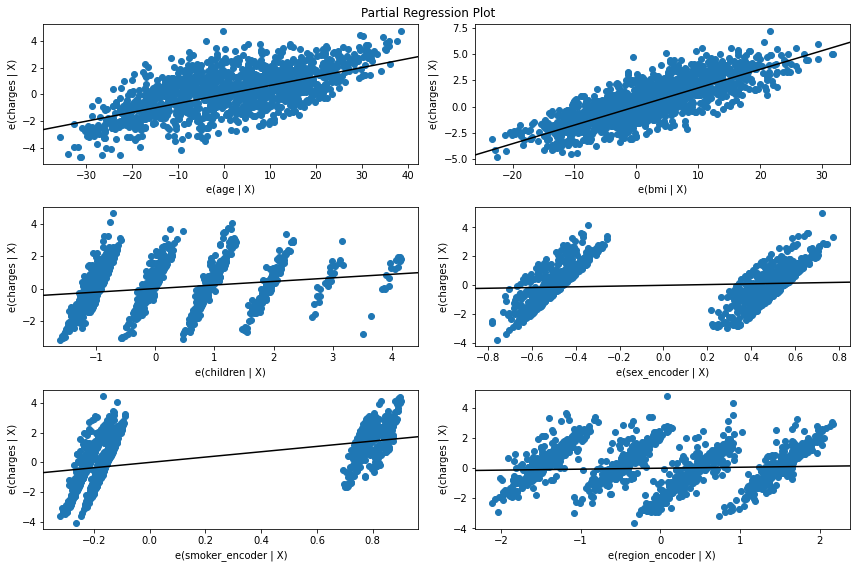

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(olsModel,fig=fig)

Above graph shows how each dependent variable are related to medical insurance charge

Text(0.5, 1.0, 'Predicted vs Actual Insurance cost')

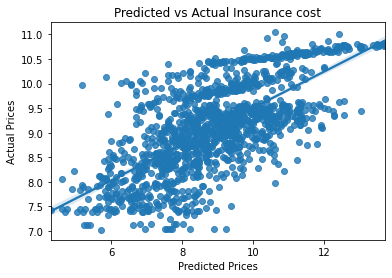

In [21]:
sns.regplot(y=df_stat.charges, x=olsModel.fittedvalues, fit_reg = True)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Insurance cost")

# MODELING

### Test and Train Data Split

In [22]:
from sklearn.model_selection import train_test_split

y=df.charges
X=df.drop(['charges'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 1,070
Test examples: 268


### Building a Model

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


nominal_features = ['sex', 'smoker', 'region']

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, drop='if_binary'))
])

preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_features)
], remainder='passthrough')

OLSModel_pipeline = Pipeline([('Processing',preprocessor),('data_processing', StandardScaler()), ('lm', LinearRegression())])
OLSModel_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('data_processing', StandardScaler()),
                ('lm', LinearRegression())])

In [158]:
OLSModel_pipeline.score(X_train, y_train)

0.7380900241558624

In [159]:
OLSModel_pipeline.score(X_test, y_test)


0.794794808450408

Text(0, 0.5, 'Test Values')

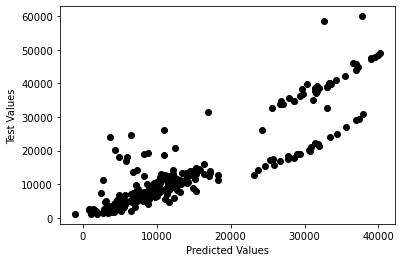

In [161]:
y_pred=OLSModel_pipeline.predict(X_test)
plt.scatter(y_pred,y_test, c="black")
plt.xlabel('Predicted Values')                          
plt.ylabel('Test Values')

# Ridge Regression

C:\Users\Sharath\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07418e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


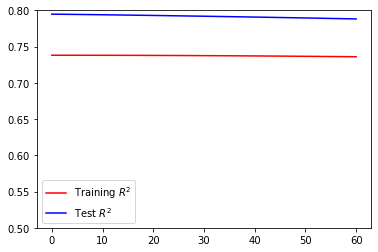

In [165]:
from sklearn.linear_model import Ridge
#alphas = [0.1, 1, 10, 100, 1000]
#alphas = [1,2,3,4,7,10,20,25,30,40,50,56,60,70,80,90,100,125,150,175,200]
alphas = [0,10,20,30,40,50,60]

training_scores = []
test_scores = []
for alpha in alphas:
    ridge_modele_pipeline = Pipeline([('Processing',preprocessor),('data_processing', StandardScaler()), ('lm', Ridge(alpha=alpha))])
    ridge_modele_pipeline.fit(X_train, y_train)
    training_scores.append(ridge_modele_pipeline.score(X_train, y_train))
    test_scores.append(ridge_modele_pipeline.score(X_test, y_test))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0.5,0.8))
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()

In [36]:
modeling_pipeline_ridge.score(X_train, y_train)

0.7198161615909262

In [37]:
modeling_pipeline_ridge.score(X_test, y_test)

0.7632466274743427

Text(0, 0.5, 'Test Values')

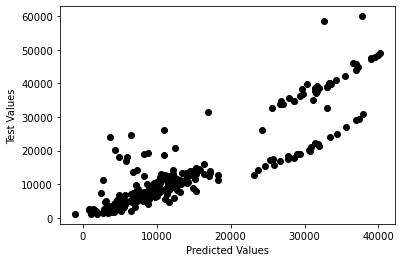

In [38]:
y_pred_ridge=modeling_pipeline_ridge.predict(X_test)
plt.scatter(y_pred,y_test, c="black")
plt.xlabel('Predicted Values')                          
plt.ylabel('Test Values')

Text(0.5, 1.0, 'Normal Q-Q Plot')

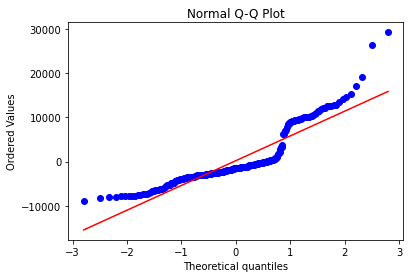

In [39]:
from scipy.stats import probplot
residuals = y_test - y_pred_ridge.reshape(-1)
probplot(residuals, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")

# Lasso Regression

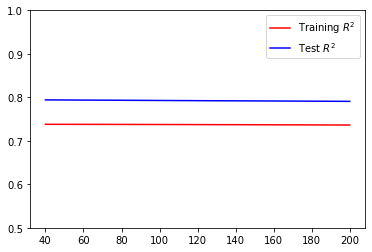

In [40]:
from sklearn.linear_model import Lasso
alphas = [40,50,56,60,70,80,90,100,125,150,175,200]
#alphas = [0.1, 1, 10, 100, 1000]

training_scores = []
test_scores = []
for alpha in alphas:
    modeling_pipeline_lasso = Pipeline([('Processing',preprocessor),('data_processing', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    modeling_pipeline_lasso.fit(X_train, y_train)
    training_scores.append(modeling_pipeline_lasso.score(X_train, y_train))
    test_scores.append(modeling_pipeline_lasso.score(X_test, y_test))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0.5,1))
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()


Text(0, 0.5, 'Test Values')

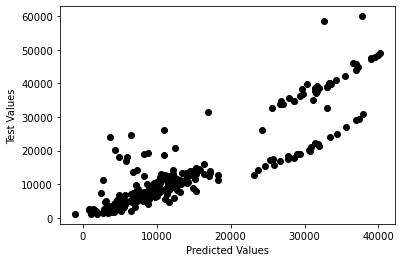

In [41]:
y_pred_lasso=modeling_pipeline_lasso.predict(X_test)
plt.scatter(y_pred,y_test, c="black")
plt.xlabel('Predicted Values')                          
plt.ylabel('Test Values')

Text(0.5, 1.0, 'Normal Q-Q Plot')

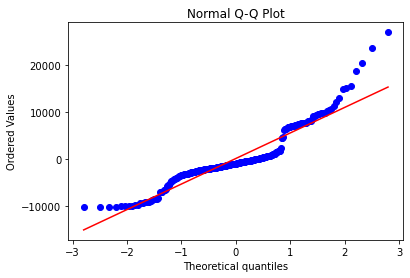

In [42]:
from scipy.stats import probplot
residuals = y_test - y_pred_lasso.reshape(-1)
probplot(residuals, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")

In [43]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
results.head()

,Actual,Predicted
12,1826.84300,4976.934445
306,20177.67113,5004.094409
318,7421.19455,8579.453048
815,1877.92940,3558.681936
157,15518.18025,24521.699573


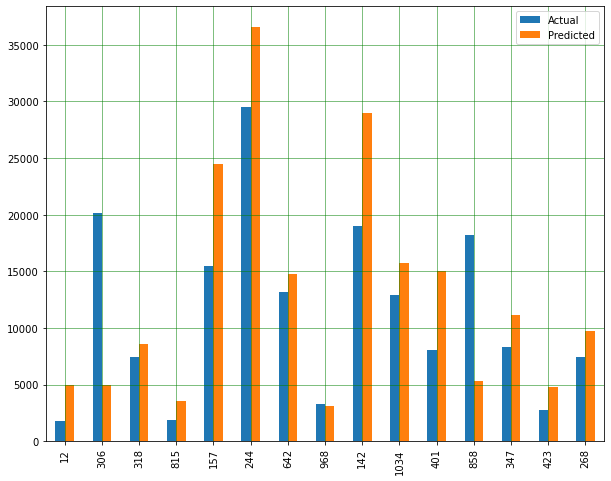

In [44]:

results.head(15).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [169]:
df1=df
df1.describe()

,Unnamed: 0,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [170]:
df1=df1.query("`bmi`<47")

In [123]:
df1['charges'] = np.log(df1['charges'])


<ipython-input-123-7f085bd6be6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['charges'] = np.log(df1['charges'])


In [171]:
df1

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [172]:
from sklearn.model_selection import train_test_split

y1=df1.charges
X1=df1.drop(['charges'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=100)

print(f'Training examples: {X_train1.shape[0]:,}')
print(f'Test examples: {X_test1.shape[0]:,}')

Training examples: 1,063
Test examples: 266


In [173]:
modeling_pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('Processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('data_processing', StandardScaler()),
                ('lm', LinearRegression())])

In [174]:
modeling_pipeline.score(X_train1, y_train1)


0.7506087597554383

In [175]:
modeling_pipeline.score(X_test1, y_test1)


0.7434977266510934

Text(0, 0.5, 'Test Values')

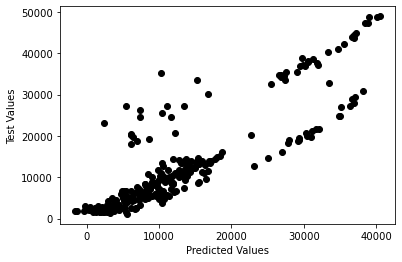

In [176]:
y_pred1=modeling_pipeline.predict(X_test1)
plt.scatter(y_pred1,y_test1, c="black")
plt.xlabel('Predicted Values')                          
plt.ylabel('Test Values')

In [177]:
results = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
results.head()

,Actual,Predicted
1104,20420.60465,6096.638174
453,1769.53165,2768.638174
1291,34828.65400,26864.638174
1277,4357.04365,6288.638174
523,5397.61670,9616.638174


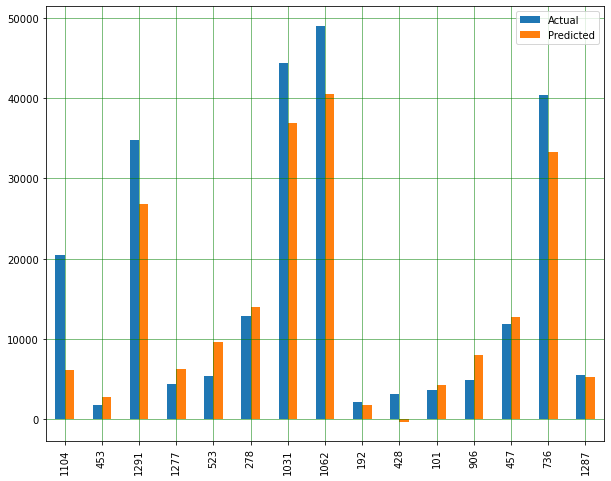

In [178]:
results.head(15).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0.5, 1.0, 'Normal Q-Q Plot')

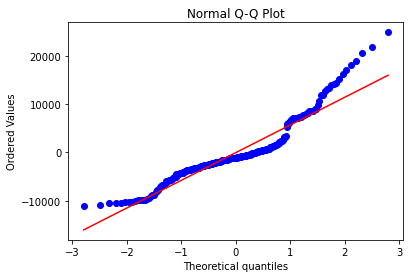

In [179]:
from scipy.stats import probplot
residuals = y_test1 - y_pred1.reshape(-1)
probplot(residuals, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")

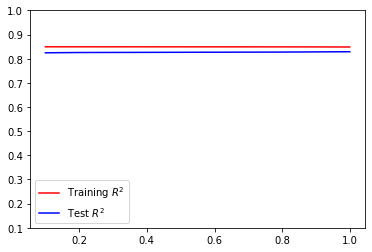

In [188]:
#alphas = [40,50,56,60,70,80,90,100,125,150,175,200]
#alphas = [0,10,20,30,40,50]
alphas =[0.1,0.2,0.5, 0.8, 0.9, 1]


training_scores1 = []
test_scores1 = []
for alpha in alphas:
    modeling_pipeline_ridge = Pipeline([('Processing',preprocessor),('data_processing', StandardScaler()), ('lm', Ridge(alpha=alpha))])
    modeling_pipeline_ridge.fit(X_train1, y_train1)
    training_scores1.append(modeling_pipeline_ridge.score(X_train1, y_train1))
    test_scores1.append(modeling_pipeline_ridge.score(X_test1, y_test1))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0.1,1))
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()

C:\Users\Sharath\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131824588.71151733, tolerance: 15368531.953535408
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sharath\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64234801.79836273, tolerance: 15368531.953535408
  model = cd_fast.enet_coordinate_descent(


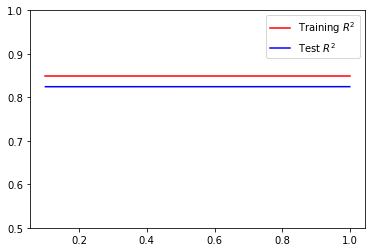

In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
#alphas = [10,50,56,60,70,80,90,100,125,150,175,200]
#alphas = [0.1, 1, 10, 100, 1000]
alphas = alphas =[0.1,0.2,0.5, 0.8, 0.9, 1]



training_scores = []
test_scores = []
for alpha in alphas:
    modeling_pipeline_lasso = Pipeline([('Processing',preprocessor),('data_processing', StandardScaler()), ('poly', PolynomialFeatures(degree=2)),('lasso', Lasso(alpha=alpha))])
    modeling_pipeline_lasso.fit(X_train1, y_train1)
    training_scores.append(modeling_pipeline_lasso.score(X_train1, y_train1))
    test_scores.append(modeling_pipeline_lasso.score(X_test1, y_test1))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0.5,1))
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()
